In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import re
import igraph as ig
plt.style.use('ggplot')

In [2]:
hashtag = 'lgbt'

In [3]:
file_path = f'../data/hashtags/edges/{hashtag}_edges.txt'
try:
    G = nx.read_edgelist(file_path, delimiter=',', create_using=nx.DiGraph())
except FileNotFoundError:
    print(f"File not found: {file_path}")


In [4]:
print(G.nodes())

['https://www.tiktok.com/@thetylerherron/video/7375306205016755498', 'https://www.tiktok.com/@wigglyspine/video/7374384546621541664\r', 'https://www.tiktok.com/@matthewsplace1/video/7375302514322836782', 'None\r', 'https://www.tiktok.com/@jacklooman/video/7375300207849819435', 'https://www.tiktok.com/@lps_and_gacha_/video/7375286351031192878\r', 'https://www.tiktok.com/@bigbadgirlyman/video/7375299489583615274', 'https://www.tiktok.com/@rebelats0ul/video/7375001137881074986\r', 'https://www.tiktok.com/@ndirishclover/video/7375297629158214955', 'https://www.tiktok.com/@meghanley6/video/7370808509220343072\r', 'https://www.tiktok.com/@genericgaymerdude/video/7375286332123401505', 'https://www.tiktok.com/@byspencerthomas/video/7374964981382778158\r', 'https://www.tiktok.com/@snakebeasst69/video/7375278671193460011', 'https://www.tiktok.com/@chrisdmowrey/video/7374948759366569262\r', 'https://www.tiktok.com/@milo.g.official/video/7375267804401978657', 'https://www.tiktok.com/@tempestdaybre

<BarContainer object of 16 artists>

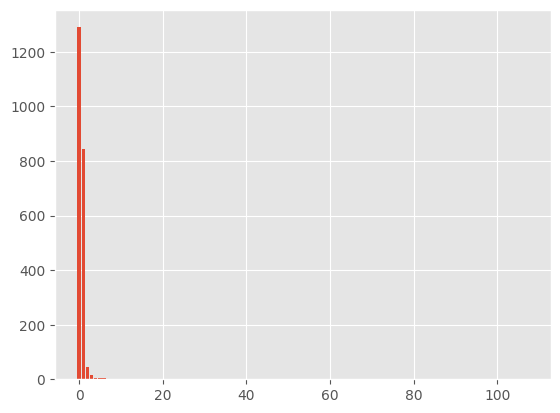

In [5]:
fig, ax = plt.subplots()
degree_sequence = degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))

In [6]:
np.unique(degree_sequence, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  13,  16,  17,
         24,  29, 107]),
 array([1290,  845,   46,   16,    3,    5,    4,    1,    1,    1,    2,
           1,    1,    1,    1,    1], dtype=int64))

In [7]:
largest_cc = max(nx.connected_components(nx.to_undirected(G)), key=len)

In [8]:
with open(f'../data/hashtags/edges/{hashtag}_edges.txt', 'r') as f:
    edges_raw = f.readlines()

In [9]:
edges_url = [edge.strip().split(',') for edge in edges_raw if 'None' not in edge.strip().split(',')]

In [10]:
expression = re.compile(r'(@.*)')
edges = []
for edge in edges_raw:
    try:
        stitcher, stitchee = edge.strip().split(',')
        stitcher = re.findall(expression, stitcher)[0]
        stitchee = re.findall(expression, stitchee)[0]
        edges.append((stitcher, stitchee))
    except IndexError:
        continue

In [11]:
edges.sort()

In [13]:
# Load in sentiment of hashtag
with open(f'../data/hashtags/videos/sentiments/{hashtag}_sentiment.txt', 'r') as f:
    sentiment = f.readlines()

In [14]:
# Load sentiment in as tuples of (video_id, sentiment), every 4 lines theres a new video, the second line of each is the id, the third line is the sentiment
sentiment = [(sentiment[i].strip(), sentiment[i+1].strip()) for i in range(1, len(sentiment), 4)]

In [15]:
sentiment[:5]

[('Video: @.autarex_video_7371190217916681514-Scene-001.mp4', 'positive'),
 ('Video: @.autarex_video_7371190217916681514-Scene-002.mp4', 'neutral'),
 ('Video: @0316amberlicious_video_7371105726032366854-Scene-001.mp4',
  'neutral'),
 ('Video: @0316amberlicious_video_7371105726032366854-Scene-002.mp4',
  'positive'),
 ('Video: @0ctober.bby_video_7370948726287797547-Scene-001.mp4', 'neutral')]

In [16]:
# Function to modify the sentiment list elements
def modify_sentiment(sentiment):
    modified_sentiment = []
    
    for s in sentiment:
        # Extract video ID and username from sentiment entry
        video_id_part = s[0].split('_')[-1].split('-')[0]  # Extract the video ID
        username = s[0].split('_')[0].split(': ')[1].replace('_', '/')  # Extract and format username

        # Construct the new string to match edges format
        new_entry = f"('{username}/video/{video_id_part}', {s[1]})"
        modified_sentiment.append(new_entry)
    
    return modified_sentiment

# Modify the sentiment list
modified_sentiment = modify_sentiment(sentiment)

In [17]:
#turn modified sentiment elements into tuples
modified_sentiment = [tuple(s.split(',')) for s in modified_sentiment]

In [18]:
#strip the first element of each tuple of the first two characters and the last character
modified_sentiment = [(s[0][2:-1], s[1]) for s in modified_sentiment]

In [19]:
#strip the last element of each tuple of the first and last character
modified_sentiment = [(s[0], s[1][1:-1]) for s in modified_sentiment]

In [20]:
sentiment = modified_sentiment

In [21]:
len(sentiment)

2536

In [22]:
len(edges)*2

2366

In [23]:
from natsort import os_sorted
edges = os_sorted(edges)
sentiment = os_sorted(sentiment)

In [24]:
sentiment[:20]

[('@/video/7366761886316055838', 'neutral'),
 ('@/video/7366761886316055838', 'positive'),
 ('@/video/7369824099620687150', 'neutral'),
 ('@/video/7369824099620687150', 'neutral'),
 ('@/video/7370020883307531552', 'neutral'),
 ('@/video/7370020883307531552', 'positive'),
 ('@/video/7370590421942045995', 'negative'),
 ('@/video/7370590421942045995', 'positive'),
 ('@/video/7371819190753250603', 'positive'),
 ('@/video/7371819190753250603', 'positive'),
 ('@/video/7372396816328953094', 'positive'),
 ('@/video/7372396816328953094', 'positive'),
 ('@/video/7372725936464170271', 'positive'),
 ('@/video/7372725936464170271', 'positive'),
 ('@.autarex/video/7371190217916681514', 'neutral'),
 ('@.autarex/video/7371190217916681514', 'positive'),
 ('@0ctober.bby/video/7370948726287797547', 'neutral'),
 ('@0ctober.bby/video/7370948726287797547', 'positive'),
 ('@2mummies/video/7372869316984737056', 'neutral'),
 ('@2mummies/video/7372869316984737056', 'neutral')]

In [25]:
edges[:5]

[('@.autarex/video/7371190217916681514',
  '@777ayonna/video/7368185881561287978'),
 ('@___slater/video/7372725936464170271',
  '@bran__flakezz/video/7370873143067462955'),
 ('@_callmelars/video/7372396816328953094',
  '@bnktalks/video/7371920925681323270'),
 ('@_junaluv_/video/7369824099620687150',
  '@fuku.zawas/video/7369354123809983786'),
 ('@_lorimusic/video/7370020883307531552',
  '@_lorimusic/video/6965177023614455046')]

In [26]:
#keep only the part of both elements in each tuple of edges that come after video/
edges = [(s[0].split('video/')[1], s[1].split('video/')[1]) for s in edges]

In [27]:
#keep only the part of the first element in each tuple of sentiment that comes after video/
sentiment = [(s[0].split('video/')[1], s[1]) for s in sentiment]

In [28]:
edges[100:120]

[('7374947296074534187', '7368171731598511402'),
 ('7373524332896603424', '7367026148145892640'),
 ('7363830267456343326', '7363294356071075115'),
 ('7363848072964607263', '7363583494842240288'),
 ('7364545968248835358', '7364397730967375150'),
 ('7367063447814606111', '7365615628943707435'),
 ('7371160336805924142', '7361913926478482734'),
 ('7373650806505098538', '7373036202141797675'),
 ('7374837719932882218', '7374759397458824481'),
 ('7364370619971947808', '7359492066004471072'),
 ('7364637128506002720', '7364497697757220139'),
 ('7372262721695255851', '7364405862200331566'),
 ('7373410790923111722', '7372281851290996011'),
 ('7364902132719422762', '7364584020379716906'),
 ('7364617572815359278', '7364444878434028831'),
 ('7371353088973606176', '7357474409906539808'),
 ('7363981568878152968', '7363637915240369409'),
 ('7367808755494423850', '7367803532935777579'),
 ('7365553019796147499', '7106567934226566443'),
 ('7375299489583615274', '7375001137881074986')]

In [29]:
sentiment[:5]

[('7366761886316055838', 'neutral'),
 ('7366761886316055838', 'positive'),
 ('7369824099620687150', 'neutral'),
 ('7369824099620687150', 'neutral'),
 ('7370020883307531552', 'neutral')]

In [30]:
# Replace every second tuple's first element with the matching video ID from edges
for i in range(len(sentiment)):
    for edge in edges:
        
        # Compare the video IDs and replace when match is found
        if i % 2 == 1:
            # Debugging: print what's being compared
            #print(f"Comparing sentiment[{i}] = {sentiment[i][0]} with edge[1] = {edge[1]} and sentiment[{i-1}] = {sentiment[i-1][0]} with edge[0] = {edge[0]}")
        
            if sentiment[i][0] == edge[0] and sentiment[i-1][0] == edge[0]:
                # Replace the first element in the current tuple with the first element from edges
                sentiment[i] = (edge[1], sentiment[i][1])
                #print(f"Match found! Updated sentiment[{i}] = {sentiment[i]}")
                break  # If a match is found, no need to check further edges for this sentiment entry


Match found! Updated sentiment[1] = ('7366368183193701675', 'positive')
Match found! Updated sentiment[3] = ('7369354123809983786', 'neutral')
Match found! Updated sentiment[5] = ('6965177023614455046', 'positive')
Match found! Updated sentiment[7] = ('7370236170950692139', 'positive')
Match found! Updated sentiment[9] = ('7371586151645318418', 'positive')
Match found! Updated sentiment[11] = ('7371920925681323270', 'positive')
Match found! Updated sentiment[13] = ('7370873143067462955', 'positive')
Match found! Updated sentiment[15] = ('7368185881561287978', 'positive')
Match found! Updated sentiment[17] = ('7370878598065982766', 'positive')
Match found! Updated sentiment[21] = ('7364100263071812906', 'neutral')
Match found! Updated sentiment[23] = ('7361803042376650026', 'positive')
Match found! Updated sentiment[25] = ('7342625720683793707', 'neutral')
Match found! Updated sentiment[27] = ('7347443158319418666', 'neutral')
Match found! Updated sentiment[29] = ('7371584089767415083',

In [31]:
sentiment[:10]

[('7366761886316055838', 'neutral'),
 ('7366368183193701675', 'positive'),
 ('7369824099620687150', 'neutral'),
 ('7369354123809983786', 'neutral'),
 ('7370020883307531552', 'neutral'),
 ('6965177023614455046', 'positive'),
 ('7370590421942045995', 'negative'),
 ('7370236170950692139', 'positive'),
 ('7371819190753250603', 'positive'),
 ('7371586151645318418', 'positive')]

In [32]:
edges[:10]

[('7371190217916681514', '7368185881561287978'),
 ('7372725936464170271', '7370873143067462955'),
 ('7372396816328953094', '7371920925681323270'),
 ('7369824099620687150', '7369354123809983786'),
 ('7370020883307531552', '6965177023614455046'),
 ('7374760073014349099', '7371614840521002283'),
 ('7370590421942045995', '7370236170950692139'),
 ('7371819190753250603', '7371586151645318418'),
 ('7366761886316055838', '7366368183193701675'),
 ('7365134417104325918', '7364618082796506398')]

In [34]:
#print the sentiment instances that occur more than twice
from collections import Counter

sentiment_counter = Counter([video[0] for video in sentiment])

for key, value in sentiment_counter.items():
    if value > 1:
        print(key, value)


7370873143067462955 2
7372869316984737056 2
7364405862200331566 9
7370188482620296491 2
7351996703848942864 2
7367039222693268779 3
7368223094579940654 2
7368994788391292206 4
7366056502131625262 2
7374126634300902688 2
7374128748502748448 2
7369609270683421998 2
7364584020379716906 4
7368171731598511402 2
7372980240357788971 2
7371204739134147886 2
7364490804515065130 2
7364444878434028831 2
7367922724171271466 2
7373722059286809899 2
7369056602659294506 2
7372457551020985605 2
7371510323779603754 2
7370508486414781742 2
7367426024109346091 2
7369563576161357088 2
7373377826336017696 2
7368247417491246378 2
7364643071436541230 2
7366693718688156958 2
7371995995325877547 2
7368602364913126699 2
7373063360440618286 2
7365997837806619946 2
7366395255895182634 2
7369733705159429418 2
7371072140080352558 2
7371606549594230062 2
7372560634644385067 2
7374768202376564010 2
7369808349602352427 2
7370095611196050731 2
7365900774284594463 2
7365383120935210286 2
7372000550918851886 2
7366323660

In [36]:
G_video = ig.Graph().as_directed()
for s, t in edges:
    G_video.add_vertex(s)
    G_video.add_vertex(t)
    G_video.add_edge(s, t)

In [37]:
#print nodes in G_video
G_video.vs['name'][:10]

['7371190217916681514',
 '7368185881561287978',
 '7372725936464170271',
 '7370873143067462955',
 '7372396816328953094',
 '7371920925681323270',
 '7369824099620687150',
 '7369354123809983786',
 '7370020883307531552',
 '6965177023614455046']

In [84]:
components = G_video.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 0]#make 2 for filtering graph to only show components with more than 2 nodes
G_video_sub = G_video.subgraph(sum(components_filtered, []))

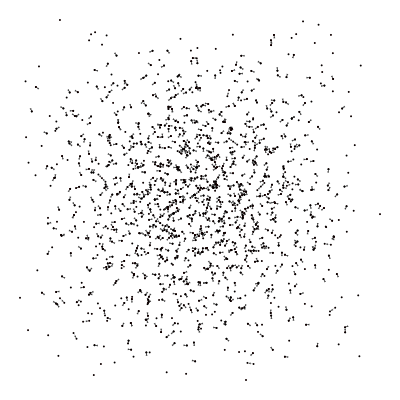

In [85]:
ig.plot(
    G_video_sub, 
    layout=G_video_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)

In [87]:
G_user = ig.Graph().as_directed()
for s, t in edges:
    G_user.add_vertex(s)
    G_user.add_vertex(t)
    G_user.add_edge(s, t)

In [90]:
components = G_user.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 0]#make 2 for filtering graph to only show components with more than 2 nodes
G_user_sub = G_user.subgraph(sum(components_filtered, []))

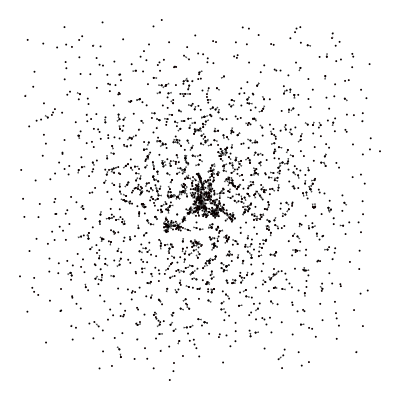

In [91]:
ig.plot(
    G_user_sub, 
    layout=G_user_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)